## python-CTD to plot cnv file from Station 16/P2, Jan 2017 (Sikuliaq, SKQ201617S)

## 2500 m cast on Jan 13 2017

## downloaded Al's 'ave' cnv files from the POMZ shared drive

In [2]:
import io
import requests
from pathlib import Path
import seaborn as sns

In [4]:
import ctd


cast = ctd.from_cnv("skq201617s-043avg.cnv")
down, up = cast.split()

down.head()

,depSMignore,latitude,longitude,t090C,t190C,potemp090C,sal00,sal11,density00,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,par,scan,nbin,flag
Pressure [dbar],,,,,,,,,,,,,,,,,,,
3.0,2.982,16.58962,-106.92288,28.7428,28.7419,28.7421,33.5449,33.5546,1021.0701,21.0573,0.20173,189.660,196.33368,0.1606,96.0634,1.000000e-12,-356.0,40.0,False
4.0,3.976,16.58962,-106.92289,28.7431,28.7431,28.7421,33.5453,33.5546,1021.0747,21.0575,0.22492,189.627,196.33235,0.1660,95.9354,1.000000e-12,727.0,701.0,False
5.0,4.970,16.58961,-106.92288,28.7435,28.7432,28.7424,33.5454,33.5548,1021.0788,21.0574,0.20475,189.639,196.33086,0.1615,96.0412,1.000000e-12,999.0,77.0,False
6.0,5.964,16.58962,-106.92288,28.7433,28.7429,28.7419,33.5455,33.5549,1021.0833,21.0576,0.20142,189.704,196.33141,0.1659,95.9365,1.000000e-12,1040.0,82.0,False
7.0,6.958,16.58962,-106.92288,28.7438,28.7434,28.7421,33.5454,33.5547,1021.0873,21.0573,0.19712,190.067,196.33012,0.1638,95.9881,1.000000e-12,1115.0,67.0,False


In [5]:
type(cast)

pandas.core.frame.DataFrame

### Plot a second variable in a different axis so we can compare the two:

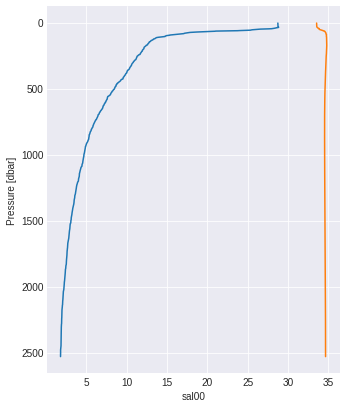

In [7]:
%matplotlib inline

from matplotlib import style

style.use("seaborn-darkgrid")


down["t090C"].plot_cast() # first temp sensor
down["sal00"].plot_cast() # conductivity [S/m]

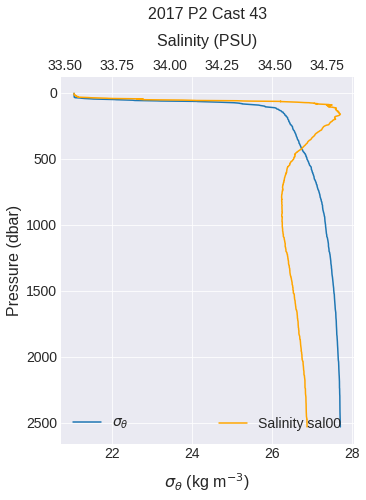

In [10]:
ax0 = down["sigma-t00"].plot_cast(label=r"$\sigma_{\theta}$")
ax1 = down["sal00"].plot_cast(
    ax=ax0,
    label="Salinity sal00",
    color="orange",
    secondary_y=True,
)


ax0.grid(True)
ax1.grid(False)

ax0.set_xlabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)", fontsize = 16, labelpad = 10)
ax1.set_xlabel('Salinity (PSU)', fontsize = 16, labelpad = 13)
ax0.set_ylabel('Pressure (dbar)', fontsize = 16)

ax0.tick_params(axis='y', labelsize=14)
ax0.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

ax0.legend(loc="lower left", fontsize = 14)
ax1.legend(loc="lower right", fontsize = 14)

ax0.set_title('2017 P2 Cast 43', fontsize = 16, pad = 15);

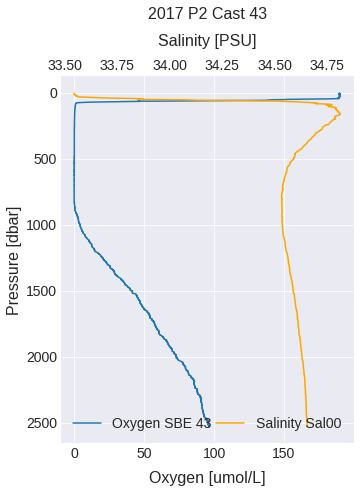

In [12]:
fig = ax0, ax1

ax0 = down["sbox0Mm/Kg"].plot_cast(label="Oxygen SBE 43")
ax1 = down["sal00"].plot_cast(
    ax=ax0,
    label="Salinity Sal00",
    color="orange",
    secondary_y=True,
)


ax0.grid(True)
ax1.grid(False)

ax0.set_ylabel('Pressure [dbar]', fontsize = 16)
ax0.set_xlabel('Oxygen [umol/L]', fontsize = 16, labelpad = 10)
ax1.set_xlabel('Salinity [PSU]', fontsize = 16, labelpad = 13)

ax0.tick_params(axis='y', labelsize=14)
ax0.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

ax0.legend(loc="lower left", fontsize = 14)
ax1.legend(loc="lower right", fontsize = 14)

ax0.set_title('2017 P2 Cast 43', fontsize = 16, pad = 15);

In [15]:
def make_patch_spines_invisible(ax):
    
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

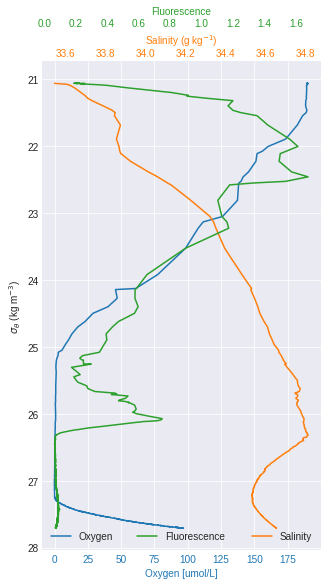

In [16]:
# density plot

import matplotlib.pyplot as plt

fig, ax0 = plt.subplots(figsize=(5, 9))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

ax0.invert_yaxis()
ax1 = ax0.twiny()
ax2 = ax0.twiny()

(l0,) = ax0.plot(cast["sbox0Mm/Kg"], cast["sigma-t00"], color=colors[0], label="Oxygen")
ax0.set_xlabel("Oxygen [umol/L]")

ax0.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")

(l1,) = ax1.plot(cast["sal00"], cast["sigma-t00"], color=colors[1], label="Salinity")
ax1.set_xlabel("Salinity (g kg$^{-1}$)")

(l2,) = ax2.plot(
    cast["flSP"], cast["sigma-t00"], color=colors[2], label="Fluorescence")
ax2.set_xlabel("Fluorescence")

make_patch_spines_invisible(ax2)
ax2.spines["top"].set_position(("axes", 1.06))
ax2.spines["top"].set_visible(True)

ax0.xaxis.label.set_color(l0.get_color())
ax1.xaxis.label.set_color(l1.get_color())
ax2.xaxis.label.set_color(l2.get_color())

ax0.tick_params(axis="x", colors=l0.get_color())
ax1.tick_params(axis="x", colors=l1.get_color())
ax2.tick_params(axis="x", colors=l2.get_color())

ax0.grid(True)
ax1.grid(False)
ax2.grid(False)

ax0.legend(loc="lower left")
ax1.legend(loc="lower right")
ax2.legend(loc="lower center");

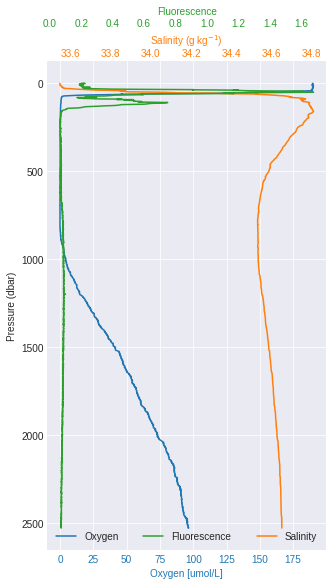

In [17]:
# depth plot 

fig, ax0 = plt.subplots(figsize=(5, 9))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

ax0.invert_yaxis()
ax1 = ax0.twiny()
ax2 = ax0.twiny()

(l0,) = ax0.plot(cast["sbox0Mm/Kg"], cast.index, color=colors[0], label="Oxygen")
ax0.set_xlabel("Oxygen [umol/L]")

ax0.set_ylabel('Pressure (dbar)')
#ax0.set_ylim([200,0])

(l1,) = ax1.plot(cast["sal00"], cast.index, color=colors[1], label="Salinity")
ax1.set_xlabel("Salinity (g kg$^{-1}$)")

(l2,) = ax2.plot(
    cast["flSP"], cast.index, color=colors[2], label="Fluorescence")
ax2.set_xlabel("Fluorescence")

make_patch_spines_invisible(ax2)
ax2.spines["top"].set_position(("axes", 1.06))
ax2.spines["top"].set_visible(True)

ax0.xaxis.label.set_color(l0.get_color())
ax1.xaxis.label.set_color(l1.get_color())
ax2.xaxis.label.set_color(l2.get_color())

ax0.tick_params(axis="x", colors=l0.get_color())
ax1.tick_params(axis="x", colors=l1.get_color())
ax2.tick_params(axis="x", colors=l2.get_color())

ax0.grid(True)
ax1.grid(False)
ax2.grid(False)

ax0.legend(loc="lower left")
ax1.legend(loc="lower right")
ax2.legend(loc="lower center");

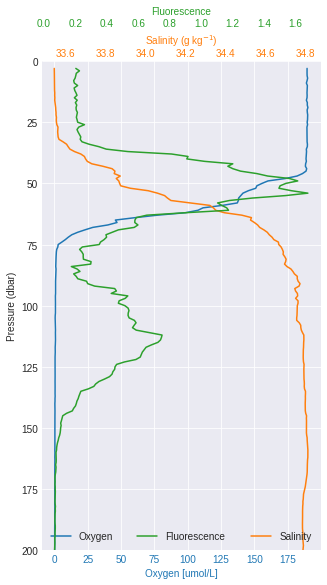

In [18]:
# depth plot but zoomed on upper oxycline

fig, ax0 = plt.subplots(figsize=(5, 9))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

ax0.invert_yaxis()
ax1 = ax0.twiny()
ax2 = ax0.twiny()

(l0,) = ax0.plot(cast["sbox0Mm/Kg"], cast.index, color=colors[0], label="Oxygen")
ax0.set_xlabel("Oxygen [umol/L]")

ax0.set_ylabel('Pressure (dbar)')
ax0.set_ylim([200,0])

(l1,) = ax1.plot(cast["sal00"], cast.index, color=colors[1], label="Salinity")
ax1.set_xlabel("Salinity (g kg$^{-1}$)")

(l2,) = ax2.plot(
    cast["flSP"], cast.index, color=colors[2], label="Fluorescence")
ax2.set_xlabel("Fluorescence")

make_patch_spines_invisible(ax2)
ax2.spines["top"].set_position(("axes", 1.06))
ax2.spines["top"].set_visible(True)

ax0.xaxis.label.set_color(l0.get_color())
ax1.xaxis.label.set_color(l1.get_color())
ax2.xaxis.label.set_color(l2.get_color())

ax0.tick_params(axis="x", colors=l0.get_color())
ax1.tick_params(axis="x", colors=l1.get_color())
ax2.tick_params(axis="x", colors=l2.get_color())

ax0.grid(True)
ax1.grid(False)
ax2.grid(False)

ax0.legend(loc="lower left")
ax1.legend(loc="lower right")
ax2.legend(loc="lower center");

In [19]:
metadata = cast._metadata

metadata.keys()

dict_keys(['header', 'config', 'names', 'skiprows', 'time', 'lon', 'lat', 'name'])

### python-ctd saves the file metadata in a dictionary so that you have easy access later on.

### e.g., sensor serial #s and file creation metadata

In [20]:
print(metadata["header"])

* Sea-Bird SBE 9 Data File:
* FileName = D:\CTD\SKQ201617S\SKQ201617S-043.hex
* Software Version Seasave V 7.22.5
* Temperature SN = 5773
* Conductivity SN = 2251
* Number of Bytes Per Scan = 37
* Number of Voltage Words = 4
* Number of Scans Averaged by the Deck Unit = 1
* System UpLoad Time = Jan 13 2017 12:18:03
* NMEA Latitude = 16 35.38 N
* NMEA Longitude = 106 55.37 W
* NMEA UTC (Time) = Jan 13 2017  12:14:58
* Store Lat/Lon Data = Append to Every Scan
* SBE 11plus V 5.1b
* number of scans to average = 1
* pressure baud rate = 9600
* NMEA baud rate = 4800
* GPIB address = 1
* advance primary conductivity  0.073 seconds
* advance secondary conductivity  0.073 seconds
* S>
** Ship: R/V Sikuliaq
** Station Number: 43
** Station Name: Station 16/P2
** Depth: 2777.71 m
** Operator: JP/Gabrielle
* System UTC = Jan 13 2017 12:18:03
*END*
